In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.stats import pearsonr


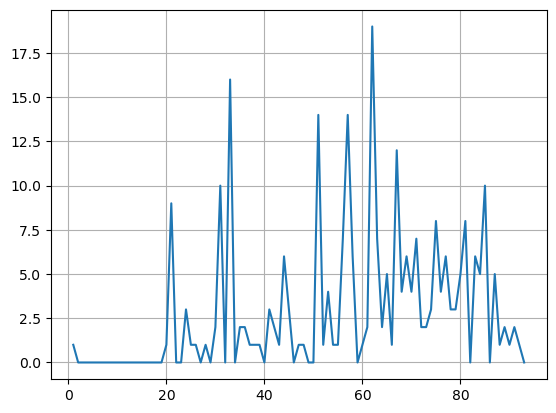

Pearson correlation: 0.337957732147185
                             OLS Regression Results                            
Dep. Variable:     Wystapienia_lacznie   R-squared:                       0.938
Model:                             OLS   Adj. R-squared:                  0.937
Method:                  Least Squares   F-statistic:                     1370.
Date:                 Thu, 19 Dec 2024   Prob (F-statistic):           1.19e-56
Time:                         16:49:10   Log-Likelihood:                -421.63
No. Observations:                   93   AIC:                             847.3
Df Residuals:                       91   BIC:                             852.3
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
c

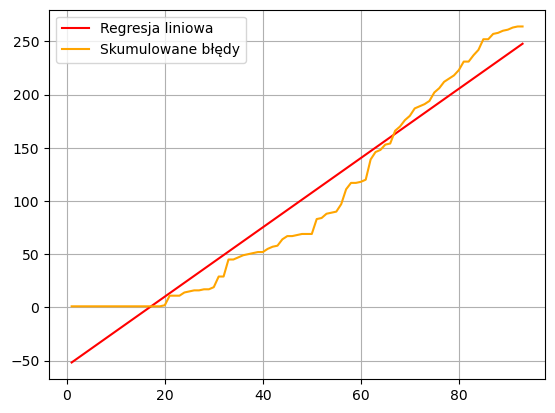

In [4]:
# Read the data from the CSV file
data = pd.read_csv('Dane_awarii.csv', sep=';', header=0)

# Plot the number of errors (`Liczba_bledow`) for each month (`Nr_miesiaca`)
plt.plot(data['Nr_miesiaca'], data['Liczba_bledow'])
plt.grid(True)
plt.show()

# Calculate the Pearson correlation coefficient between 'Liczba_bledow' and 'Nr_miesiaca'
corr, _ = pearsonr(data['Liczba_bledow'], data['Nr_miesiaca'])
print(f"Pearson correlation: {corr}")

# Add a new column 'Wystapienia_lacznie' to store the cumulative number of errors
data['Wystapienia_lacznie'] = 0

# Loop through all rows to calculate the cumulative sum of errors
for i in range(len(data)):
    # Cumulative sum of errors up to and including the current row
    data.loc[i, 'Wystapienia_lacznie'] = data['Liczba_bledow'][:i + 1].sum()





X=sm.add_constant(data['Nr_miesiaca'])
y=data['Wystapienia_lacznie']
wynik= sm.OLS(y, X).fit()
print(wynik.summary())

# Plot the cumulative sum of errors for visualization
plt.plot(data['Nr_miesiaca'], wynik.predict(X), label='Regresja liniowa', color='red')
plt.plot(data['Nr_miesiaca'], data['Wystapienia_lacznie'], label='Skumulowane błędy', color='orange')
#regresja

plt.grid(True)
plt.legend()
plt.show()
